# Data Augmentation
参考: [NumPyでの画像のData Augmentationまとめ (https://www.kumilog.net/entry/numpy-data-augmentation)](https://www.kumilog.net/entry/numpy-data-augmentation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

image = np.array(Image.open('cat.jpg'))

## Original Image

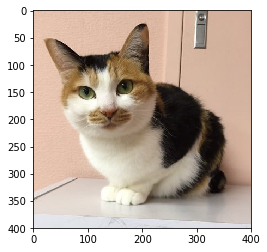

In [2]:
plt.imshow(image)

## Horizontal Flip

In [3]:
def horizontal_flip(image):
    return image[:, ::-1, :]

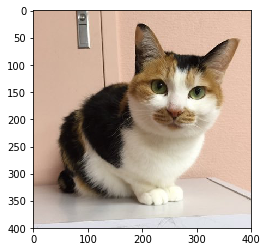

In [4]:
plt.imshow(horizontal_flip(image))

## Vertical Flip

In [5]:
def vertical_flip(image):
    return image[::-1, :, :]

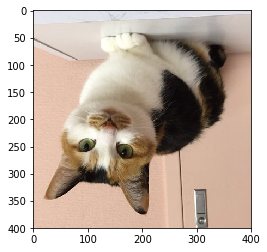

In [6]:
plt.imshow(vertical_flip(image))

## Random Crop

In [7]:
def random_crop(image, crop_size=(224, 224)):
    h, w, _ = image.shape

    # 0~(400-224)の間で画像のtop, leftを決める
    top = np.random.randint(0, h - crop_size[0])
    left = np.random.randint(0, w - crop_size[1])

    # top, leftから画像のサイズである224を足して、bottomとrightを決める
    bottom = top + crop_size[0]
    right = left + crop_size[1]

    # 決めたtop, bottom, left, rightを使って画像を抜き出す
    return image[top:bottom, left:right, :]

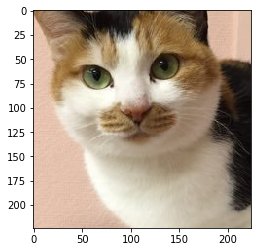

In [8]:
plt.imshow(random_crop(image))

## Scale Augmentation

In [9]:
from scipy.misc import imresize

def scale_augmentation(image, scale_range=(256, 400), crop_size=224):
    scale_size = np.random.randint(*scale_range)
    return random_crop(imresize(image, (scale_size, scale_size)), (crop_size, crop_size))

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


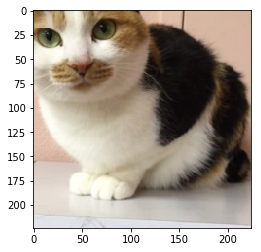

In [10]:
plt.imshow(scale_augmentation(image))

## Random Rotation

In [11]:
from scipy.ndimage.interpolation import rotate

def random_rotation(image, angle_range=(0, 180)):
    h, w, _ = image.shape
    angle = np.random.randint(*angle_range)
    return rotate(imresize(image, (h, w)), angle)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


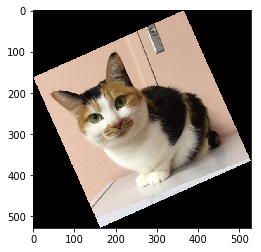

In [12]:
plt.imshow(random_rotation(image))

## Cutout
元論文: [Improved Regularization of Convolutional Neural Networks with Cutout](https://arxiv.org/abs/1708.04552)

In [13]:
def cutout(image_origin, mask_size):
    # 最後に使うfill()は元の画像を書き換えるので、コピーしておく
    image = np.copy(image_origin)
    mask_value = image.mean()

    h, w, _ = image.shape
    # マスクをかける場所のtop, leftをランダムに決める
    # はみ出すことを許すので、0以上ではなく負の値もとる(最大mask_size // 2はみ出す)
    top = np.random.randint(0 - mask_size // 2, h - mask_size)
    left = np.random.randint(0 - mask_size // 2, w - mask_size)
    bottom = top + mask_size
    right = left + mask_size

    # はみ出した場合の処理
    if top < 0:
        top = 0
    if left < 0:
        left = 0

    # マスク部分の画素値を平均値で埋める
    image[top:bottom, left:right, :].fill(mask_value)
    return image

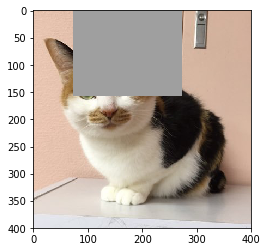

In [14]:
plt.imshow(cutout(image, 200))

## Random Erasing
元論文: [Random Erasing Data Augmentation](https://arxiv.org/abs/1708.04896)

In [15]:
def random_erasing(image_origin, p=0.5, s=(0.02, 0.4), r=(0.3, 3)):
    # マスクするかしないか
    if np.random.rand() > p:
        return image_origin
    image = np.copy(image_origin)

    # マスクする画素値をランダムで決める
    mask_value = np.random.randint(0, 256)

    h, w, _ = image.shape
    # マスクのサイズを元画像のs(0.02~0.4)倍の範囲からランダムに決める
    mask_area = np.random.randint(h * w * s[0], h * w * s[1])

    # マスクのアスペクト比をr(0.3~3)の範囲からランダムに決める
    mask_aspect_ratio = np.random.rand() * r[1] + r[0]

    # マスクのサイズとアスペクト比からマスクの高さと幅を決める
    # 算出した高さと幅(のどちらか)が元画像より大きくなることがあるので修正する
    mask_height = int(np.sqrt(mask_area / mask_aspect_ratio))
    if mask_height > h - 1:
        mask_height = h - 1
    mask_width = int(mask_aspect_ratio * mask_height)
    if mask_width > w - 1:
        mask_width = w - 1

    top = np.random.randint(0, h - mask_height)
    left = np.random.randint(0, w - mask_width)
    bottom = top + mask_height
    right = left + mask_width
    image[top:bottom, left:right, :].fill(mask_value)
    return image

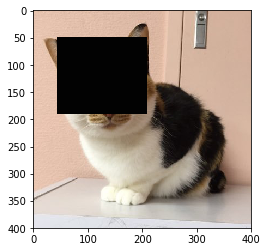

In [16]:
plt.imshow(random_erasing(image))